In [0]:
import numpy as np
import pandas as pd
df=pd.read_csv("Credit.csv")
credit=df

In [0]:
df.head()
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [0]:
credit=credit.fillna(credit.median())
for x in credit.columns:  
  if credit[x].dtype=='object':
      credit[x]=pd.Categorical(credit[x]).codes
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,2,333
1,2,106.025,6645,483,3,82,15,0,1,1,1,903
2,3,104.593,7075,514,4,71,11,1,0,0,1,580
3,4,148.924,9504,681,3,36,11,0,0,0,1,964
4,5,55.882,4897,357,2,68,16,1,0,1,2,331


In [0]:
from sklearn.preprocessing import minmax_scale
scld=pd.DataFrame(minmax_scale(credit,feature_range=(0,1)),columns=credit.columns)
scld.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0.000000,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,1.0,0.0,1.0,1.0,0.166583
1,0.002506,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.0,1.0,1.0,0.5,0.451726
2,0.005013,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,1.0,0.0,0.0,0.5,0.290145
3,0.007519,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.0,0.0,0.0,0.5,0.482241
4,0.010025,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,1.0,0.0,1.0,1.0,0.165583


In [0]:
scld.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,0.50000,0.197781,0.297182,0.294646,0.244688,0.435567,0.563333,0.482500,0.100000,0.61250,0.625000,0.260138
std,0.28976,0.199933,0.176765,0.174043,0.171409,0.229997,0.208347,0.500319,0.300376,0.48779,0.413585,0.229994
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.25000,0.060434,0.171006,0.173510,0.125000,0.250000,0.400000,0.000000,0.000000,0.00000,0.500000,0.034392
50%,0.50000,0.129121,0.288520,0.282340,0.250000,0.440000,0.600000,0.000000,0.000000,1.00000,0.500000,0.229865
75%,0.75000,0.267284,0.384266,0.387233,0.375000,0.626667,0.733333,1.000000,0.000000,1.00000,1.000000,0.431716
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [0]:
from sklearn.cluster import KMeans

In [0]:
sse=[]
cluster_range=range(2,12)
for i in cluster_range:
  model=KMeans(n_clusters=i,random_state=0)
  model.fit(scld)
  sse.append(model.inertia_)

In [0]:
sse

[343.83409594260866,
 286.9323326960711,
 247.61989301603785,
 230.43862877223523,
 214.16459805805087,
 200.86472327661704,
 188.0351890799592,
 177.732995826611,
 167.49835440690188,
 159.8287922064509]

In [0]:
sse_df=pd.DataFrame({"num_clusters":cluster_range,"SSE":sse})
print(sse_df)

   num_clusters         SSE
0             2  343.834096
1             3  286.932333
2             4  247.619893
3             5  230.438629
4             6  214.164598
5             7  200.864723
6             8  188.035189
7             9  177.732996
8            10  167.498354
9            11  159.828792


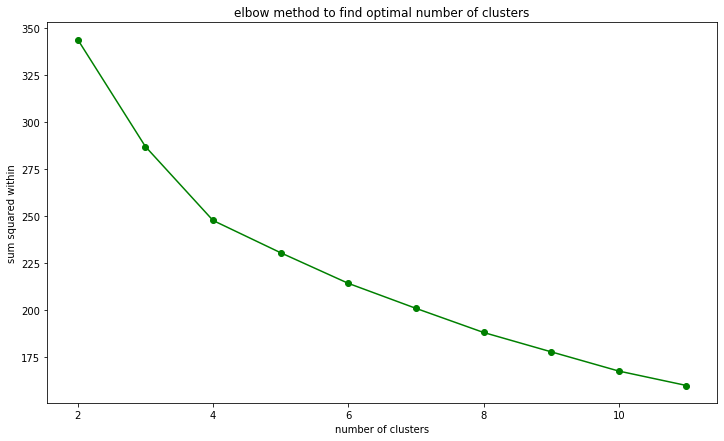

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.plot(sse_df.num_clusters,sse_df.SSE,marker='o',color="#008000")
plt.xlabel("number of clusters")
plt.ylabel("sum squared within")
plt.title("elbow method to find optimal number of clusters")
plt.show()

In [0]:
#we will continue our analysis with n_clusters=4
kmeans=KMeans(n_clusters=4,random_state=42)
#fit the model
k_model=kmeans.fit(scld)

In [0]:
k_model.cluster_centers_

array([[ 5.37411906e-01,  1.97886327e-01,  2.90010512e-01,
         2.89434974e-01,  2.58547009e-01,  4.21310541e-01,
         5.54985755e-01,  1.00000000e+00,  5.98290598e-02,
         1.00000000e+00,  6.32478632e-01,  2.40201297e-01],
       [ 4.75700971e-01,  2.08523771e-01,  3.12110512e-01,
         3.09134210e-01,  2.29492188e-01,  4.23020833e-01,
         5.86458333e-01, -1.27675648e-15,  1.01562500e-01,
         1.00000000e+00,  6.56250000e-01,  2.76376469e-01],
       [ 5.32350613e-01,  2.03258497e-01,  3.03858897e-01,
         2.98605766e-01,  2.33552632e-01,  4.55087719e-01,
         5.78947368e-01,  1.00000000e+00,  1.18421053e-01,
         5.55111512e-16,  6.11842105e-01,  2.77856033e-01],
       [ 4.52840963e-01,  1.74950955e-01,  2.77190761e-01,
         2.75077957e-01,  2.59493671e-01,  4.58227848e-01,
         5.23206751e-01, -9.99200722e-16,  1.39240506e-01,
         6.66133815e-16,  5.75949367e-01,  2.46306698e-01]])

In [0]:
k_model.n_clusters

4

In [0]:
centroids=pd.DataFrame(np.round(k_model.cluster_centers_,2),columns=credit.columns)
centroids

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0.54,0.20,0.29,0.29,0.26,0.42,0.55,1.0,0.06,1.0,0.63,0.24
1,0.48,0.21,0.31,0.31,0.23,0.42,0.59,-0.0,0.10,1.0,0.66,0.28
2,0.53,0.20,0.30,0.30,0.23,0.46,0.58,1.0,0.12,0.0,0.61,0.28
3,0.45,0.17,0.28,0.28,0.26,0.46,0.52,-0.0,0.14,0.0,0.58,0.25


In [0]:
k_model.labels_

array([0, 1, 2, 3, 0, 2, 3, 2, 3, 1, 0, 2, 1, 0, 3, 1, 1, 1, 1, 2, 3, 3,
       0, 0, 3, 1, 3, 2, 1, 3, 1, 0, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 3, 3, 3, 2, 1, 1,
       1, 3, 1, 0, 0, 1, 1, 2, 1, 0, 2, 3, 1, 2, 1, 2, 2, 3, 2, 1, 0, 3,
       0, 3, 0, 0, 2, 2, 3, 1, 2, 1, 3, 2, 2, 3, 2, 2, 3, 1, 0, 2, 0, 0,
       1, 3, 0, 1, 2, 3, 3, 0, 3, 2, 1, 0, 3, 3, 1, 1, 1, 3, 2, 0, 1, 0,
       0, 1, 1, 3, 3, 0, 1, 2, 1, 0, 2, 3, 0, 2, 1, 0, 1, 0, 1, 1, 3, 2,
       0, 1, 1, 1, 1, 2, 3, 0, 0, 3, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2,
       0, 1, 3, 3, 0, 0, 1, 1, 1, 3, 2, 2, 2, 1, 1, 3, 0, 1, 0, 1, 0, 3,
       1, 0, 0, 1, 1, 3, 3, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 3,
       3, 3, 2, 0, 0, 1, 3, 1, 3, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 3, 1, 3, 2, 0, 1, 1, 0, 3, 0, 1, 2, 3, 0, 0, 3, 0, 1, 1, 3,
       0, 1, 1, 1, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 1, 3, 3, 3, 1, 1, 0, 1,
       3, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 3, 1, 0,

In [0]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,2,333
1,2,106.025,6645,483,3,82,15,0,1,1,1,903
2,3,104.593,7075,514,4,71,11,1,0,0,1,580
3,4,148.924,9504,681,3,36,11,0,0,0,1,964
4,5,55.882,4897,357,2,68,16,1,0,1,2,331


In [0]:
credit['cluster']=k_model.labels_
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,cluster
0,1,14.891,3606,283,2,34,11,1,0,1,2,333,0
1,2,106.025,6645,483,3,82,15,0,1,1,1,903,1
2,3,104.593,7075,514,4,71,11,1,0,0,1,580,2
3,4,148.924,9504,681,3,36,11,0,0,0,1,964,3
4,5,55.882,4897,357,2,68,16,1,0,1,2,331,0


In [0]:
credit.to_csv("credit_assignment.csv")